<a href="https://colab.research.google.com/github/falawar7/AAI614_ELAWAR/blob/main/Week6/FE_Notebook6_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AAI614: Data Science & its Applications

*Notebook 6.5: Experiment with PCA*


*Source: This notebook contains an amanded excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas*

In [1]:
from packaging import version
import sklearn
import matplotlib

assert version.parse(matplotlib.__version__) >= version.parse("3.7.3")

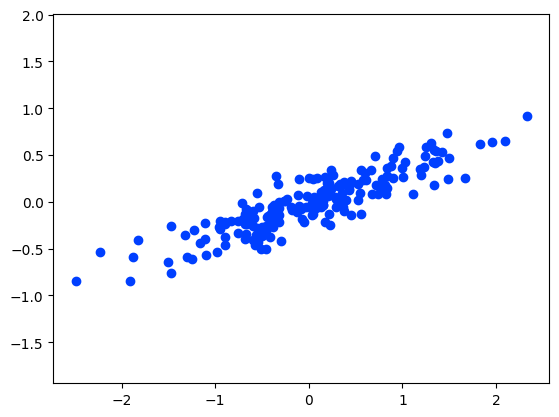

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-bright')

rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [3]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
PCA(n_components=5)

PCA(n_components=5)

In [5]:
print(pca.components_)

[[ 0.94446029  0.32862557]
 [-0.32862557  0.94446029]]


In [6]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


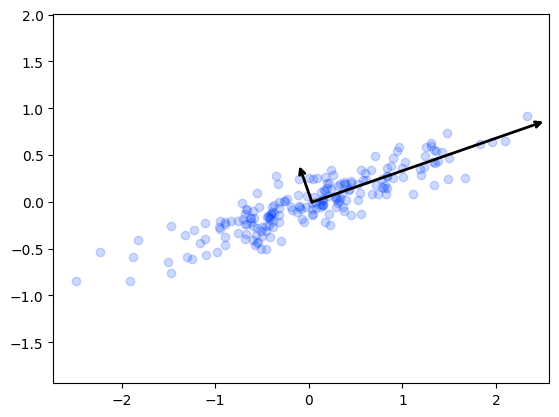

In [7]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [8]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape: ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:  (200, 2)
transformed shape: (200, 1)


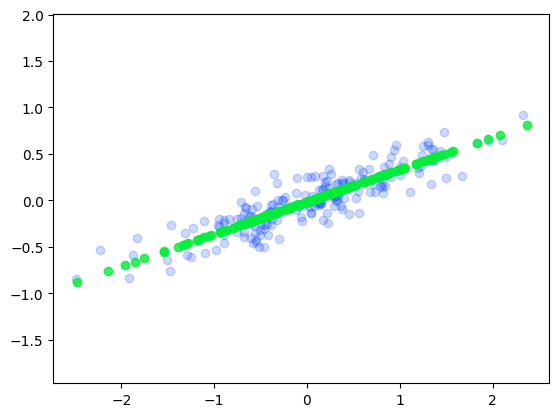

In [9]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

In [10]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [11]:
pca = PCA(2) # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


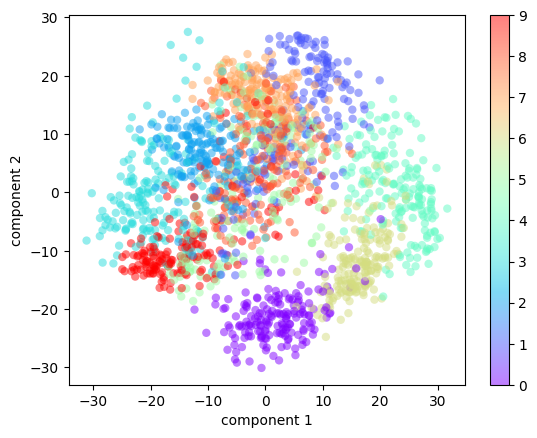

In [12]:
plt.scatter(projected[:, 0], projected[:, 1], c=digits.target, edgecolor='none', alpha=0.5, cmap=matplotlib.colormaps.get_cmap('rainbow'))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

# **Working with Wine Data**

In [13]:
from packaging import version
import sklearn
import matplotlib

assert version.parse(matplotlib.__version__) >= version.parse("3.7.3")

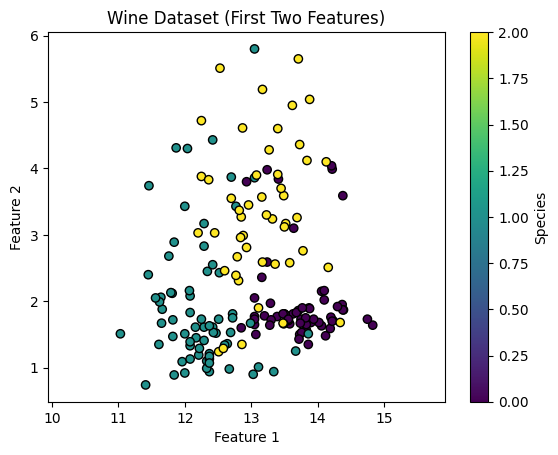

In [39]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
plt.style.use('seaborn-v0_8-bright')


iris = datasets.load_wine()
X = wine.data[:, :2]

# Create the scatter plot
plt.scatter(X[:, 0], X[:, 1], c=wine.target, cmap='viridis', edgecolors='k')
plt.axis('equal')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Wine Dataset (First Two Features)')
plt.colorbar(label='Species')
plt.show()

In [43]:
wine = datasets.load_wine()
wine_data = wine.data

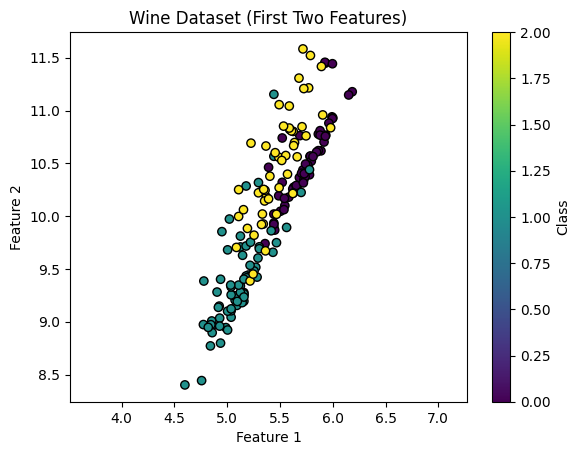

In [44]:
rng = np.random.RandomState(1)
X = np.dot(wine_data[:, :2], rng.rand(2, 2))

# Create the scatter plot
plt.scatter(X[:, 0], X[:, 1], c=wine.target, cmap='viridis', edgecolors='k')
plt.axis('equal')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Wine Dataset (First Two Features)')
plt.colorbar(label='Class')
plt.show()

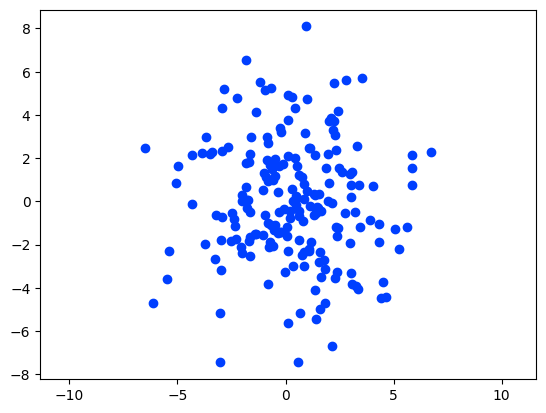

In [47]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-bright')

rng = np.random.RandomState(1)
X = np.dot(wine_data[2, 2], rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [49]:
rng = np.random.RandomState(1)
X = np.dot(wine_data[2, 2], rng.randn(2, 200)).T

In [57]:
from sklearn.decomposition import PCA

pca_wine = PCA(n_components=2)
pca_wine.fit(X)
pca_wine = PCA(n_components=5)

In [92]:
from sklearn.decomposition import PCA

pca_wine = PCA(n_components=2)  # Change n_components to 2 or less
pca_wine.fit(X)

# You can now access the components
pca_wine.components_

array([[-0.17857538,  0.98392623],
       [ 0.98392623,  0.17857538]])

In [93]:
print(pca_wine.explained_variance_)

[1.83429621 1.39257772]


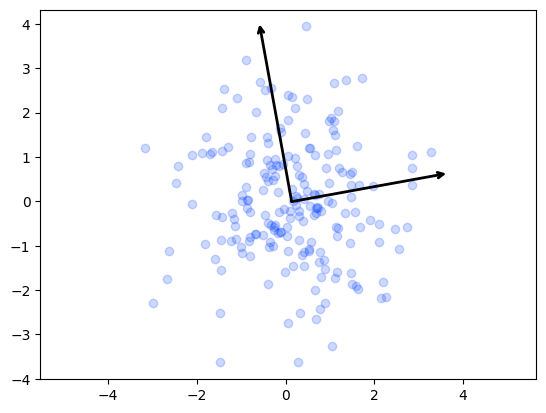

In [95]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca_wine.explained_variance_, pca_wine.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca_wine.mean_, pca_wine.mean_ + v)
plt.axis('equal');

In [89]:
pc_wine = PCA(n_components=1)
pca_wine.fit(X)
X_pca = pca_wine.transform(X)
print("original shape: ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:  (200, 2)
transformed shape: (200, 2)


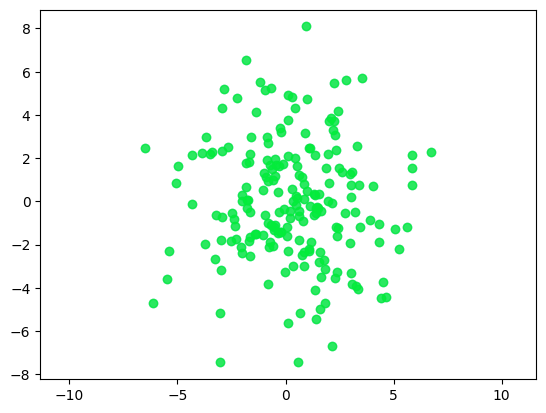

In [65]:
X_new = pca_wine.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

In [66]:
from sklearn.datasets import load_wine
wine = load_wine()
wine.data.shape

(178, 13)

In [67]:
pca_wine = PCA(2) # project from 64 to 2 dimensions
projected_wine = pca_wine.fit_transform(wine.data)
print(wine.data.shape)
print(projected_wine.shape)

(178, 13)
(178, 2)


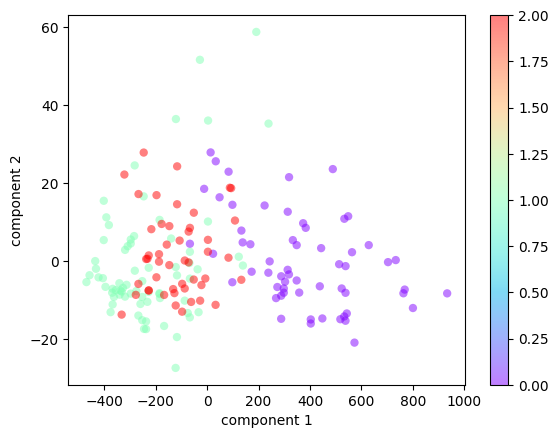

In [68]:
plt.scatter(projected_wine[:, 0], projected_wine[:, 1], c=wine.target, edgecolor='none', alpha=0.5, cmap=matplotlib.colormaps.get_cmap('rainbow'))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

# **Working with IRIS Data**

In [ ]:
from packaging import version
import sklearn
import matplotlib

assert version.parse(matplotlib.__version__) >= version.parse("3.7.3")

In [71]:
iris = datasets.load_iris()
iris_data = iris.data

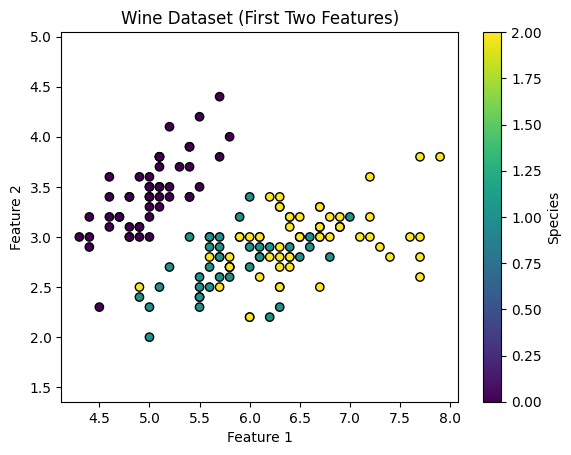

In [70]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
plt.style.use('seaborn-v0_8-bright')


iris = datasets.load_iris()
X = iris.data[:, :2]

# Create the scatter plot
plt.scatter(X[:, 0], X[:, 1], c=iris.target, cmap='viridis', edgecolors='k')
plt.axis('equal')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Wine Dataset (First Two Features)')
plt.colorbar(label='Species')
plt.show()

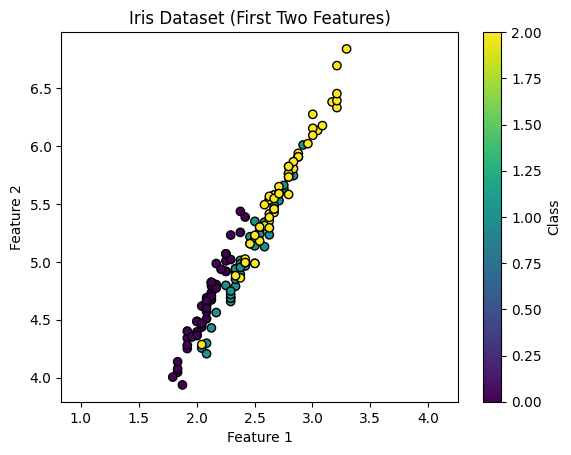

In [73]:
rng = np.random.RandomState(1)
X = np.dot(iris_data[:, :2], rng.rand(2, 2))

# Create the scatter plot
plt.scatter(X[:, 0], X[:, 1], c=iris.target, cmap='viridis', edgecolors='k')
plt.axis('equal')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Iris Dataset (First Two Features)')
plt.colorbar(label='Class')
plt.show()

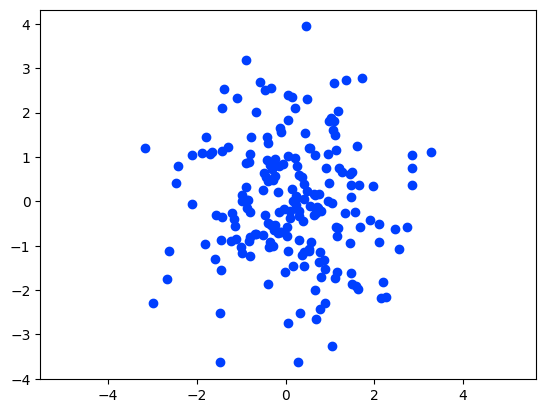

In [74]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-bright')

rng = np.random.RandomState(1)
X = np.dot(iris_data[2, 2], rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [98]:
rng = np.random.RandomState(1)
X = np.dot(iris_data[2, 2], rng.randn(2, 200)).T

In [99]:
from sklearn.decomposition import PCA

pca_iris = PCA(n_components=2)
pca_iris.fit(X)
pca_iris = PCA(n_components=5)

In [100]:
from sklearn.decomposition import PCA

pca_iris = PCA(n_components=2)
pca_iris.fit(X)


pca_iris.components_

array([[-0.17857538,  0.98392623],
       [ 0.98392623,  0.17857538]])

In [101]:
print(pca_iris.explained_variance_)

[1.83429621 1.39257772]


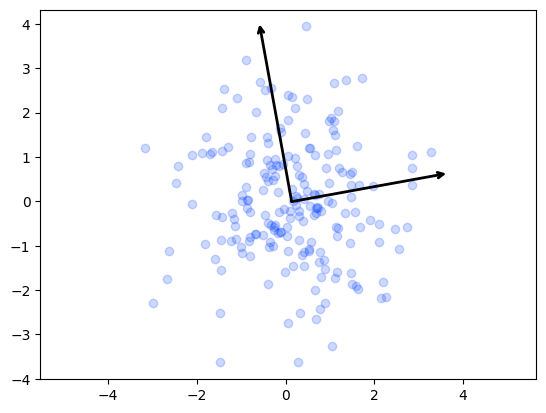

In [102]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca_iris.explained_variance_, pca_iris.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca_iris.mean_, pca_iris.mean_ + v)
plt.axis('equal');

In [83]:
pc_iris = PCA(n_components=1)
pca_iris.fit(X)
X_pca = pca_iris.transform(X)
print("original shape: ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:  (200, 2)
transformed shape: (200, 2)


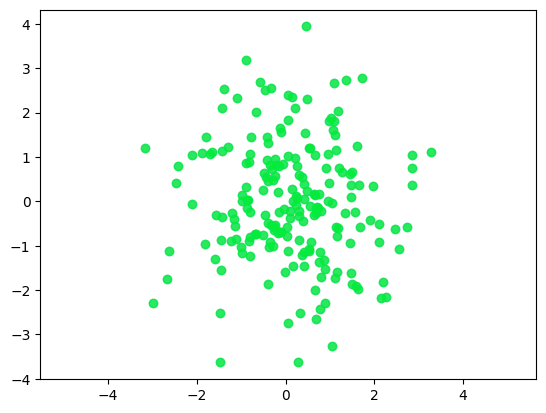

In [86]:
X_new = pca_iris.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

In [ ]:
from sklearn.datasets import load_wine
wine = load_wine()
wine.data.shape

(178, 13)

In [87]:
pca_iris = PCA(2) # project from 64 to 2 dimensions
projected_iris = pca_iris.fit_transform(iris.data)
print(iris.data.shape)
print(projected_iris.shape)

(150, 4)
(150, 2)


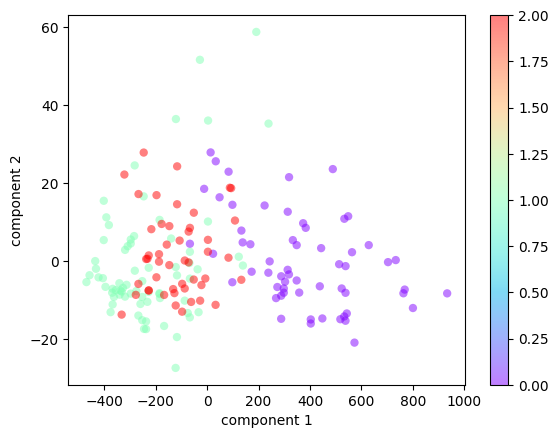

In [88]:
plt.scatter(projected_wine[:, 0], projected_wine[:, 1], c=wine.target, edgecolor='none', alpha=0.5, cmap=matplotlib.colormaps.get_cmap('rainbow'))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();